<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Hand_Sign_Language_Using_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -qU transformers torch datasets gdcm pydicom pinecone-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install -qU sentence-transformers pinecone-client pinecone_text


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!wget https://github.com/entbappy/Sign-Language-Generation-From-Video-using-YOLOV5/blob/master/Data/Sign_language_data.zip

--2023-08-05 13:42:32--  https://github.com/entbappy/Sign-Language-Generation-From-Video-using-YOLOV5/blob/master/Data/Sign_language_data.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4962 (4.8K) [text/plain]
Saving to: ‘Sign_language_data.zip’

Sign_language_data. 100%[===================>]   4.85K  --.-KB/s    in 0s      

2023-08-05 13:42:32 (61.8 MB/s) - ‘Sign_language_data.zip’ saved [4962/4962]



In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
#! unzip "/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/Sign_language_data.zip" -d "/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE"

In [6]:
import os
import pandas as pd
train_images = os.listdir("/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/train/images")
train_labels  = [items.split(".")[0] for items in os.listdir("/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/train/labels")]

In [7]:
imgs = [os.path.join("/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/train/images",img) for img in train_images]

In [8]:
train_df = pd.DataFrame({"Images":imgs,"Label":train_labels})
train_df.head()

,Images,Label
0,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello
1,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello
2,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello
3,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello
4,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello


In [9]:
test_imgs = [os.path.join("/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/test/images",img) for img in os.listdir("/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/test/images")]

In [10]:
test_labels = [items.split(".")[0] for items in os.listdir("/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/test/labels")]

In [11]:
test_df = pd.DataFrame({"Images":test_imgs,"Label":test_labels})

In [12]:
test_df.shape

(30, 2)

In [13]:
train_df.shape

(120, 2)

In [14]:
import os
import torch
import skimage
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer

In [22]:
from getpass import getpass
os.environ["PINECONE_API_KEY"] = getpass()

··········


In [15]:
import pinecone
pinecone.init(api_key="d7f7ba67-9483-4026-a189-b0547e9ca5ff",
              environment="us-west1-gcp")

In [16]:
index_name = "image-search"
if index_name not in pinecone.list_indexes():
  pinecone.create_index(index_name,
                        dimension=512,
                        metric="cosine",
                        )


In [17]:
index = pinecone.Index(index_name)

## Image embeddings

In [18]:
from sentence_transformers import SentenceTransformer
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
#
#Load a CLIP model from huggingface
model = SentenceTransformer('sentence-transformers/clip-ViT-B-32',
                            device=device)

In [38]:
dense_vec = model.encode(train_df.loc[1].values[0])
dense_vec.reshape(1,-1).shape

(1, 512)

In [35]:
train_df.loc[1].values[0]

'/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/train/images/Hello.81794bae-a6d1-11ec-9ec1-84a93ea18ae6.jpg'

In [19]:
ims = train_df['Images'].values.tolist()

In [20]:
from tqdm import tqdm
batch_size = 10
#
for i in tqdm(range(0,len(ims),batch_size)):
  i_end = min(i+batch_size,len(ims))
  #extract metadata
  meta_batch = train_df.iloc[i:i_end]
  meta_dict = meta_batch.to_dict(orient="records")
  img_batch = ims[1:i_end]
  #create dense vectors
  dense_embeds = model.encode(img_batch)
  #create unique ids
  ids = [str(x) for x in range(i,i_end)]
  upserts = []
  #
  for id,dense,meta in zip(ids,dense_embeds,meta_dict):
    upserts.append({"id":id,
                    "values":dense,
                    "metadata":meta})
  #upload documents to vector store
  index.upsert(upserts)




  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pinecone/core/utils/__init__.py:111: FutureWarning: DEPRECATED since v2.2.1 [Will be removed in v3.0.0]: Deprecated type passed in 'values'. The ability to pass a numpy ndarray as part of a dictionary argument to upsert() will be removed in a future version of the pinecone client. To remove this warning, use the numpy.ndarray.tolist method to convert your ndarray into a python list before calling upsert().
  warnings.warn(message, FutureWarning)
100%|██████████| 12/12 [00:13<00:00,  1.12s/it]


In [21]:
index.describe_index_stats()

{'dimension': 512,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 119}},
 'total_vector_count': 119}

In [22]:
test_df.head()

,Images,Label
0,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello
1,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello
2,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello
3,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello
4,/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LA...,Hello


In [40]:
test_df.iloc[10]['Images']

'/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/test/images/No.b81769f8-a6d1-11ec-8d33-84a93ea18ae6.jpg'

In [45]:
test_df.iloc[10]['Label']

'No'

In [23]:
tst_images = test_df["Images"].values.tolist()

In [54]:
tst_images[15]

'/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/test/images/Thanks.d40538dc-a6d1-11ec-83da-84a93ea18ae6.jpg'

In [61]:
query = model.encode(tst_images[15]).tolist()

In [62]:
len(query)

512

In [63]:
result = index.query(top_k=3,
                     vector = query,
                     include_metadata = True)

In [65]:
result

{'matches': [{'id': '28',
              'metadata': {'Images': '/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/train/images/Yes.a7172876-a6d1-11ec-949d-84a93ea18ae6.jpg',
                           'Label': 'IloveYou'},
              'score': 0.970698476,
              'values': []},
             {'id': '58',
              'metadata': {'Images': '/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/train/images/No.cdd3d20a-a6d1-11ec-9387-84a93ea18ae6.jpg',
                           'Label': 'No'},
              'score': 0.970698357,
              'values': []},
             {'id': '78',
              'metadata': {'Images': '/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/train/images/Thanks.e9e54c62-a6d1-11ec-8f75-84a93ea18ae6.jpg',
                           'Label': 'Please'},
              'score': 0.970698357,
              'values': []}],
 'namespace': ''}

In [66]:
result["matches"][0]['metadata']['Label']

'IloveYou'

In [70]:
train_df[train_df['Label'] == "IloveYou"]['Images'].head(1).values.tolist()

['/content/drive/MyDrive/ABHISHEK_THAKUR/SIGN_LANGUAGE/train/images/Yes.9c38304a-a6d1-11ec-9479-84a93ea18ae6.jpg']

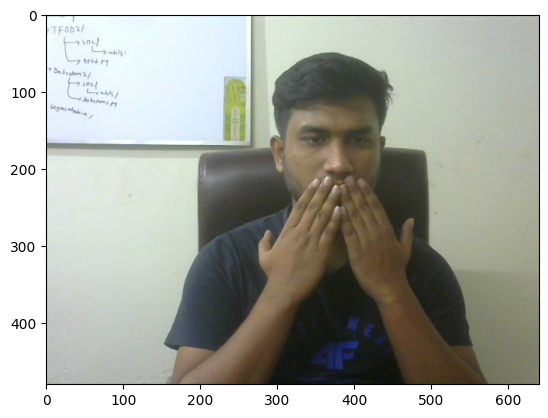

In [67]:
from PIL import Image
import matplotlib.pyplot as plt
plt.imshow(Image.open(tst_images[15]))


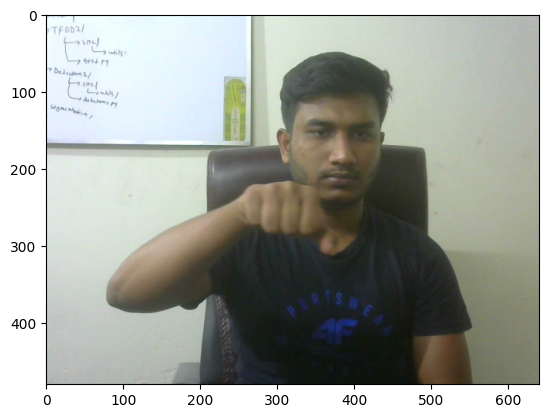

In [71]:
plt.imshow(Image.open(train_df[train_df['Label'] == "IloveYou"]['Images'].head(1).values.tolist()[0]))